# Visualizing Fire Scars Through False Color Image

**Author:** Jaslyn Miura

**GitHub Repository:** https://github.com/jaslynmiura/eds220-hwk4

### Purpose:


### Highlights:


### About the Data

### References:

In [2]:
# Import necessary libraries.
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import numpy as np

In [8]:
# Reading in the Eaton fire perimeter.
eaton_perimeter = gpd.read_file(os.path.join('data',
                                             'Eaton_Perimeter_20250121',
                                             'Eaton_Perimeter_20250121.shp'))

# Reading in the Palisade fire perimeter.
palisades_perimeter = gpd.read_file(os.path.join('data',
                                                'Palisades_Perimeter_20250121',
                                                'Palisades_Perimeter_20250121.shp'))

## Explore the Perimeter Data

Your summary should include, at least, the CRS of the data and whether this is projected or geographic.

In [4]:
# Using head() to view the first 5 rows of the eaton perimeter dataframe.
eaton_perimeter.head(5)

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [ ]:
# Check the CRS of the eaton_perimeter.
print('CRS of the eaton_perimeter:', eaton_perimeter.crs)

CRS of the Eaton Perimeter: EPSG:3857


In [6]:
# Check if the eaton_perimeter data is projected or geographic.
if eaton_perimeter.crs.is_projected:
    print('The eaton_perimeter has a projected CRS')
else:
    print('The eaton_perimeter has a geographic CRS')

The eaton_perimeter has a projected CRS


In [10]:
# Check the data types in the columns of the eaton_perimeter dataframe.
print('Data types of the values in each columm:\n', eaton_perimeter.dtypes)

Data types of the values in each columm:
 OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object


In [7]:
# Check if the eaton_perimeter has an NA values.
print('Count of NA values:\n', eaton_perimeter.isna().sum())

Count of NA values:
 OBJECTID      0
type          0
Shape__Are    0
Shape__Len    0
geometry      0
dtype: int64


In [ ]:
# Using head() to view the first 5 rows of the palisades_perimeter dataframe.
palisades_perimeter.head(5)

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


In [ ]:
# Check the CRS of the palisades_perimeter.
print('CRS of the palisades_perimeter:', palisades_perimeter.crs)

CRS of the Palisade Perimeter: EPSG:3857


In [ ]:
# Check if palisades_perimeter data is projected or geographic.
if palisades_perimeter.crs.is_projected:
    print('The palisades_perimeter has a projected CRS')
else:
    print('The palisades_perimeter has a geographic CRS')

The palisade_perimeter has a projected CRS


In [11]:
# Check the data types in the columns of the eaton_perimeter dataframe.
print('Data types of the values in each columm:\n', palisades_perimeter.dtypes)

Data types of the values in each columm:
 OBJECTID         int64
type            object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object


In [9]:
# Check if the eaton_perimeter has an NA values.
print('Count of NA values:\n', palisades_perimeter.isna().sum())

Count of NA values:
 OBJECTID      0
type          0
Shape__Are    0
Shape__Len    0
geometry      0
dtype: int64


In [ ]:
# Using an assert test to ensure that the eaton_perimeter and palisades_perimeter CRS is the same.
assert eaton_perimeter.crs == palisades_perimeter.crs

In [ ]:
# Using concat() to stack the Eaton and Palisades perimeter dataframes.
perimeter = pd.concat([eaton_perimeter, palisades_perimeter])

<Axes: >

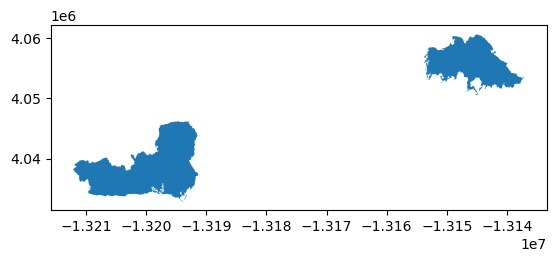

In [12]:
perimeter.plot()

In [14]:
# Reading in the landsat data.
landsat = xr.open_dataset(os.path.join('data',
                                       'landsat8-2025-02-23-palisades-eaton.nc'))

Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables, dimensions, and coordinates.

In [14]:
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

Data Variables: red, green, blue, nir08, swir22, spatial_ref

Dimensions: (y: 1418, x: 2742), Coordinates (x,y), time

Coordinates: y: 3799050, x: 334410

In [ ]:
# Printing the dimensions of the landsat data.
print('Dimensions of the landsat data:', landsat.sizes)

Dimensions of the landsat data: Frozen({'y': 1418, 'x': 2742})


In [ ]:
# Printing the coordinates of the landsat data.
print('Coordinates of the landsat data:', landsat.coords)

Coordinates of the landsat data: Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...


In [32]:
# Printing the CRS of the landsat data.
print('CRS of the landsat data:', landsat.rio.crs)

CRS of the landsat data: None


 **Is this a geospatial object?** 

Since the landsat xarray does not have a CRS, it is not a geospatial object.

 Note - the landsat data does not have CRS

In [16]:
print('CRS:', landsat.spatial_ref.crs_wkt)

CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [17]:
print('CRS:', landsat.spatial_ref.crs_wkt)
landsat = landsat.rio.write_crs(landsat.spatial_ref.crs_wkt)

CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [18]:
print('CRS:', landsat.rio.crs)

CRS: EPSG:32611


## True Color Image

Without creating any new variables:

- select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,

- convert it to a numpy.array using the to_array() method, and then

- use .plot.imshow() to create an RGB image with the data. There will be two warnings, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


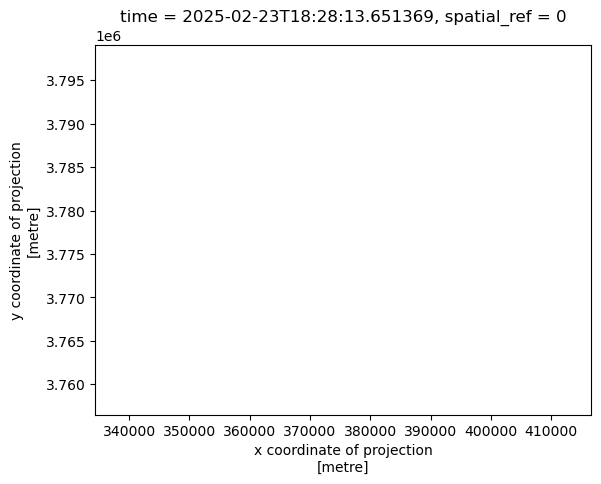

In [19]:
landsat[['red', 'green', 'blue']].to_array().plot.imshow()

In [20]:
np.isnan(landsat[['red', 'green', 'blue']]).any()


<xarray.Dataset> Size: 19B
Dimensions:      ()
Coordinates:
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          bool 1B False
    green        bool 1B True
    blue         bool 1B True

There are `nan` values in the green and blue bands

In [21]:
landsat[['green', 'blue']].fillna(0)

<xarray.Dataset> Size: 31MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    green        (y, x) float32 16MB 9.93e+03 9.687e+03 ... 9.984e+03 9.662e+03
    blue         (y, x) float32 16MB 9.29e+03 9.183e+03 ... 9.49e+03 9.187e+03

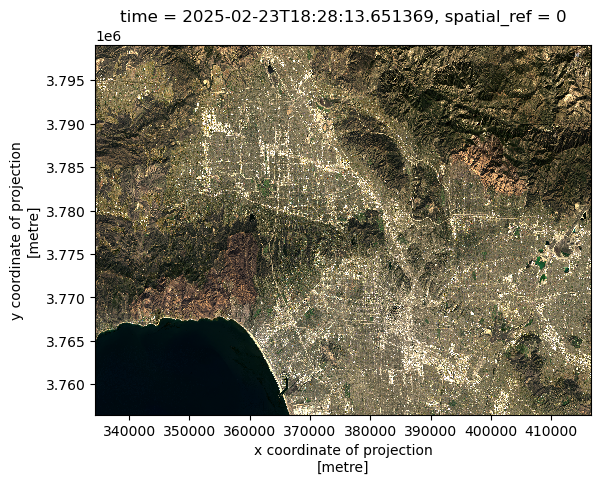

In [22]:
# Running the landsat
landsat[['red', 'green', 'blue']].fillna(0).to_array().plot.imshow(robust = True)

## False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

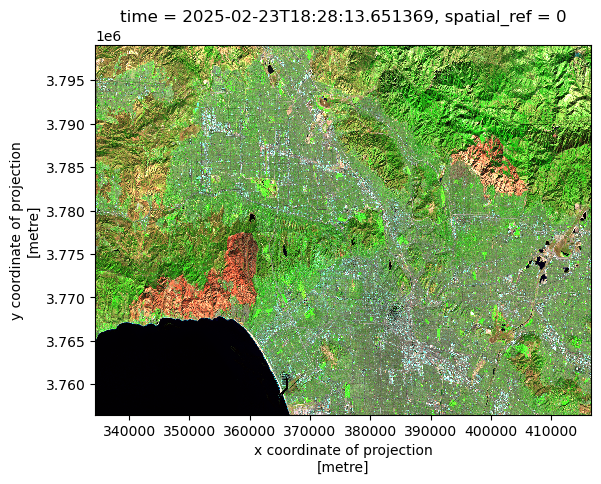

In [23]:
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

In [24]:
false_color = landsat[['swir22', 'nir08', 'red']].to_array()

In [25]:
perimeter = perimeter.to_crs(false_color.rio.crs)
assert perimeter.crs == false_color.rio.crs

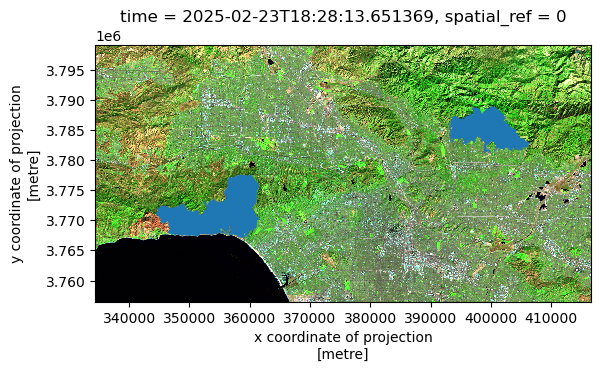

In [26]:
fig, ax = plt.subplots()

false_color.plot.imshow(
    ax = ax,
    robust = True,
    rgb='variable')
perimeter.plot(ax=ax)

plt.show()

In [27]:
# Clip rasters to AOI
false_color_perimeter= false_color.rio.clip_box(*perimeter.total_bounds)

## Map

Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which

Write a figure description for the map including a brief explanation of how false color imagery is being used.


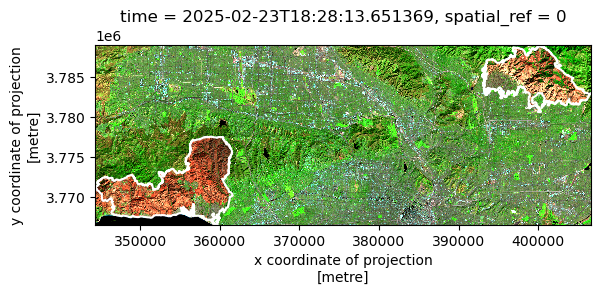

In [28]:
fig, ax = plt.subplots()

false_color_perimeter.plot.imshow(
    ax = ax,
    robust = True)
    #rgb='variable')
perimeter.plot(ax=ax,
               edgecolor='white',
               facecolor = 'none',
               linewidth = 1.5)

plt.show()